# Car Prices - Solution

In [1]:
import os.path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
file_path = "data"
file_name = "imports-85.data"

## Exploratory Data Analysis

## Load the data

In [3]:
column_names = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_of_doors", "body_style",
                "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight",
                "engine_type", "num_of_cylinders", "engine_size", "fuel_system", "bore", "stroke", 
                "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

df = pd.read_csv(os.path.join(file_path, file_name), header=-1, names=column_names, na_values='?')

## Examine the data

In [4]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Use .info() to see length and dtypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-

## Check for missing data

In [6]:
df.isnull().any()

symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

In [7]:
df[df.columns[df.isnull().any()].tolist()].isnull().sum()

normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

## Check for duplicates

In [8]:
df.duplicated().sum()

0

## Identify numerical and categorical variables

In [9]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [10]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [11]:
numeric_cols = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']

In [12]:
categirical_cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']

## Summarize numerical and categorical variables

In [13]:
df.describe(include = [np.number])

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
df.describe(include = ['O'])

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


## Removing unnecesary columns

In [15]:
df.drop(["symboling", "normalized_losses"], axis=1, inplace=True)
df.head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 no

## Dealing with missing data

In [17]:
df[df.num_of_doors.isnull()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [18]:
df.num_of_doors[df.body_style=="sedan"].value_counts()

four    79
two     15
Name: num_of_doors, dtype: int64

In [19]:
df.loc[27, "num_of_doors"] = "four"
df.loc[63, "num_of_doors"] = "four"

In [20]:
df[df.bore.isnull()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [21]:
df.bore.fillna(df.bore.mean(), inplace=True)

In [22]:
df[df.stroke.isnull()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.329751,NaN,9.4,101.0,6000.0,17,23,10945.0
56,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.329751,NaN,9.4,101.0,6000.0,17,23,11845.0
57,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,3.329751,NaN,9.4,101.0,6000.0,17,23,13645.0
58,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,3.329751,NaN,9.4,135.0,6000.0,16,23,15645.0


In [23]:
df.stroke.fillna(df.stroke.mean(), inplace=True)

In [24]:
df[df.horsepower.isnull()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [25]:
df.horsepower.fillna(df.horsepower.mean(), inplace=True)

In [26]:
df[df.peak_rpm.isnull()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,...,132,mpfi,3.46,3.9,8.7,104.256158,NaN,23,31,9295.0
131,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,...,132,mpfi,3.46,3.9,8.7,104.256158,NaN,23,31,9895.0


In [27]:
df.peak_rpm.fillna(df.peak_rpm.mean(), inplace=True)

In [28]:
df.drop(df[df.price.isnull()].index, axis=0, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 24 columns):
make                 201 non-null object
fuel_type            201 non-null object
aspiration           201 non-null object
num_of_doors         201 non-null object
body_style           201 non-null object
drive_wheels         201 non-null object
engine_location      201 non-null object
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
engine_type          201 non-null object
num_of_cylinders     201 non-null object
engine_size          201 non-null int64
fuel_system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 no

# Now the dataset is clean

## Visualize target variable (price)

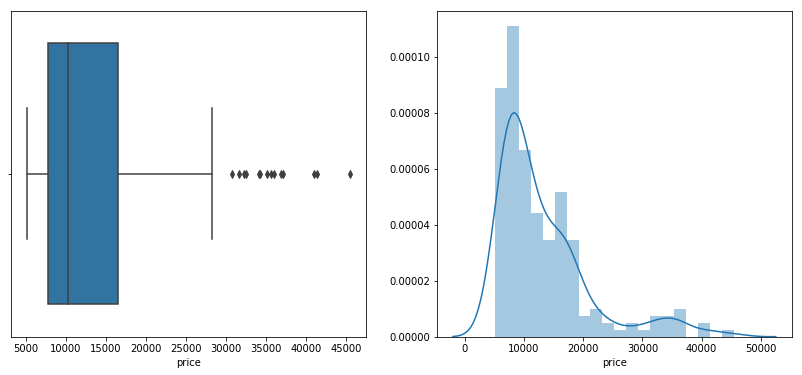

In [30]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(df.price)
plt.subplot(1,2,2)
sns.distplot(df.price, bins=20)
plt.show()

## Use IQR rule to identify potential outliers

In [31]:
stat = df.price.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64
The upper and lower bounds for suspected outliers are 29587.5 and -5312.5.


## Examine potential outliers

In [32]:
#check potential outlier below lower bound
df[df.price < 0]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [33]:
#check potential outlier above upper bound
df.loc[df.price > 30000, 'make'].value_counts()

mercedes-benz    5
porsche          3
jaguar           3
bmw              3
Name: make, dtype: int64

This seems reasonable - these makes are expensive.

## Plot features

In [34]:
def plot_feature(df, col):
    '''
    Make plot for each features
    left, the distribution of samples on the feature
    right, the dependance of price on the feature
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    elif df[col].dtype == 'float64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean price
        #in each category
        mean = df.groupby(col)['price'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64':
        #plot the mean price for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['price'].mean()
        std = df.groupby(col)['price'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, alpha = 0.1)
    elif df[col].dtype == 'float64':
        #plot the mean price for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['price'].mean()
        std = df.groupby(col)['price'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'price', data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Prices')
    plt.show()

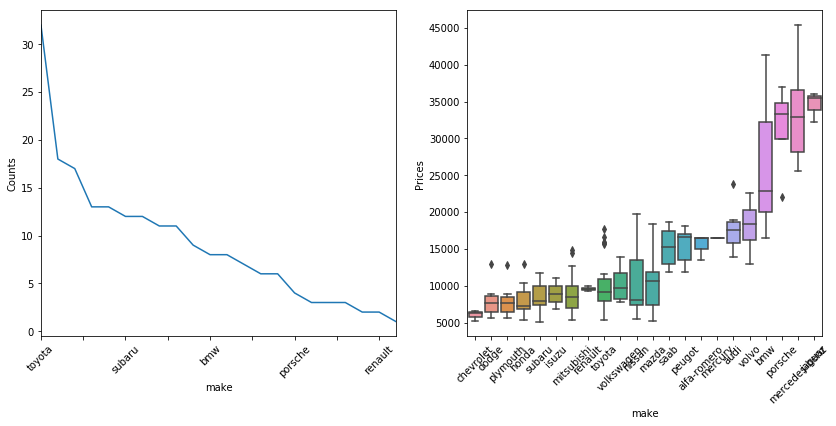

In [35]:
plot_feature(df, 'make')

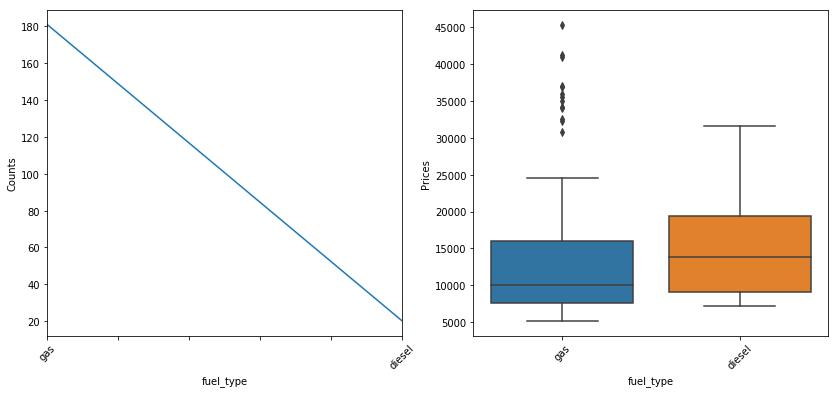

In [36]:
plot_feature(df, 'fuel_type')

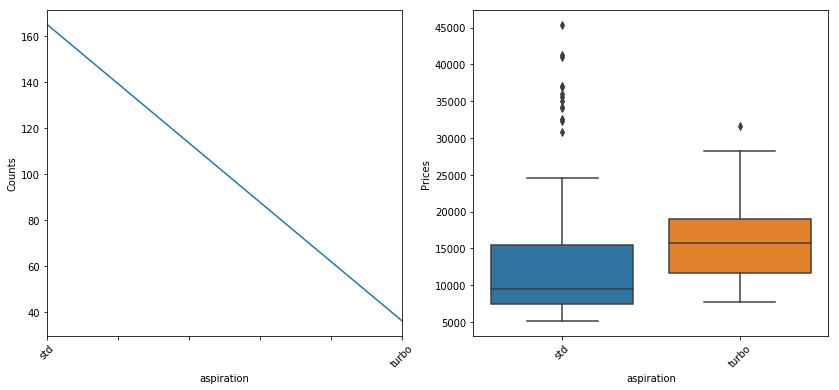

In [37]:
plot_feature(df, 'aspiration')

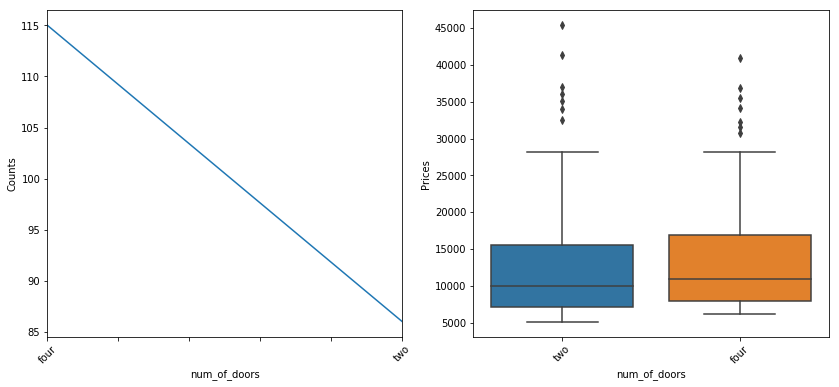

In [38]:
plot_feature(df, 'num_of_doors')

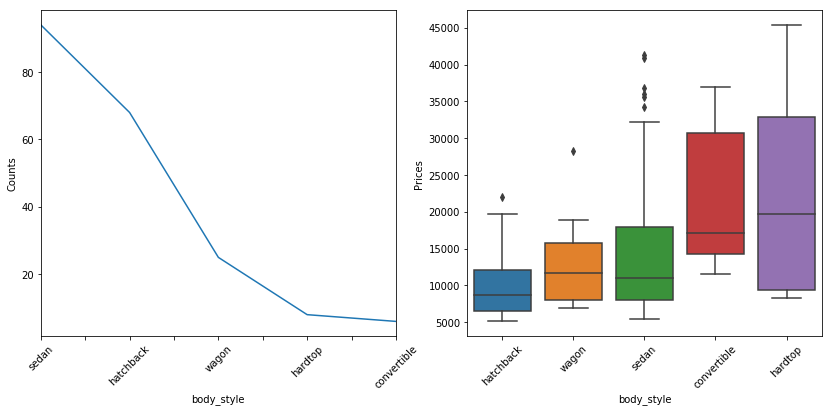

In [39]:
plot_feature(df, 'body_style')

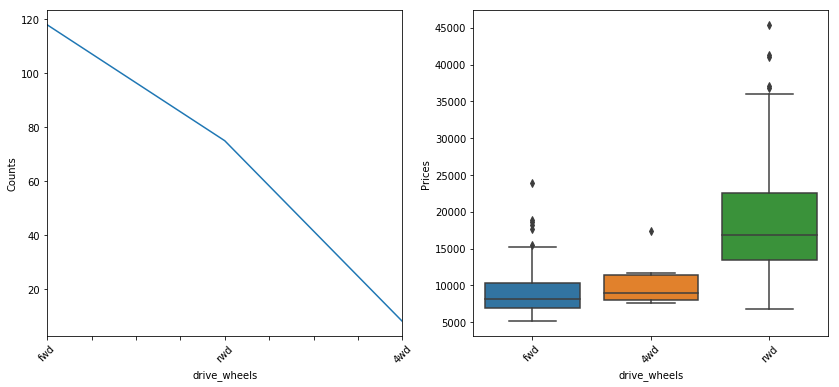

In [40]:
plot_feature(df, 'drive_wheels')

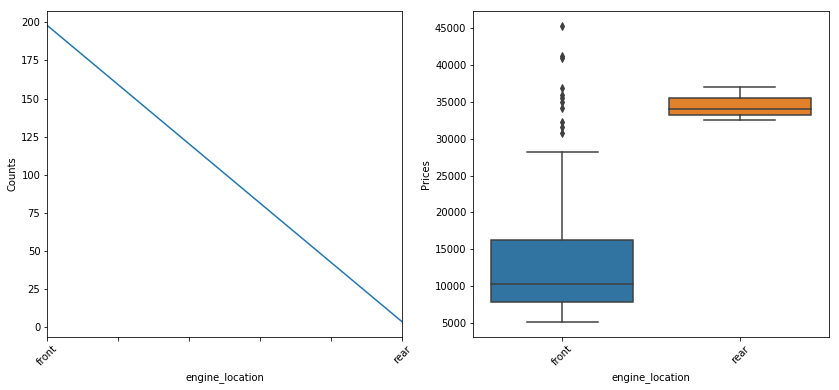

In [41]:
plot_feature(df, 'engine_location')

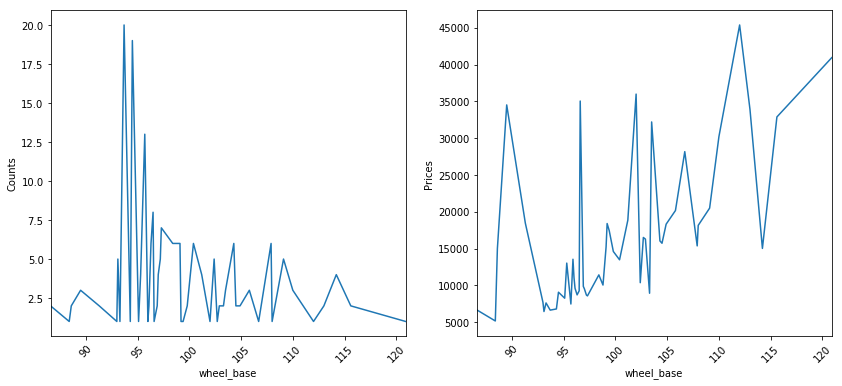

In [42]:
plot_feature(df, 'wheel_base')

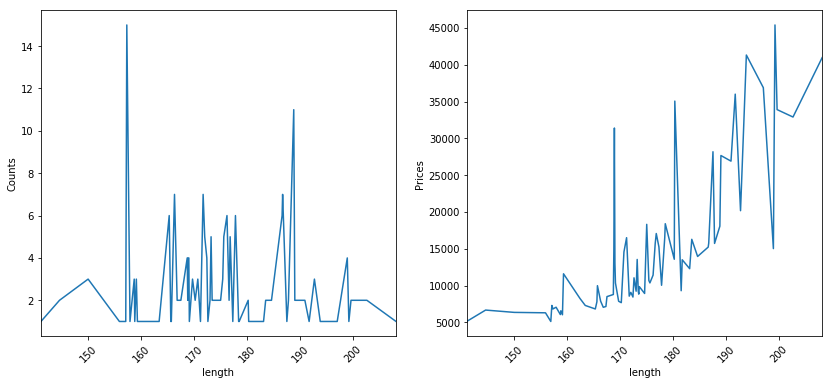

In [43]:
plot_feature(df, 'length')

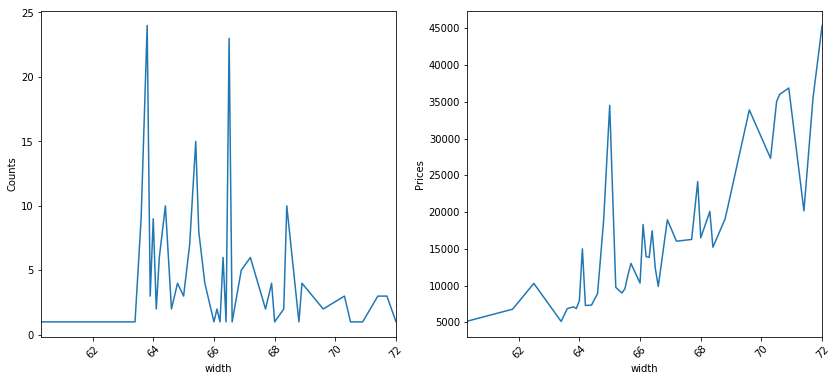

In [44]:
plot_feature(df, 'width')

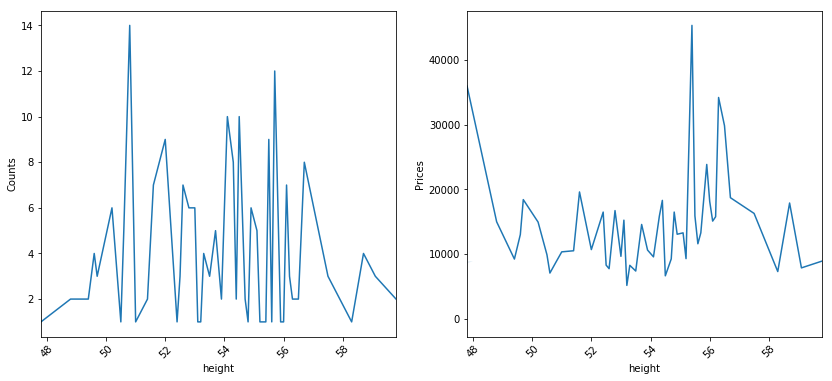

In [45]:
plot_feature(df, 'height')

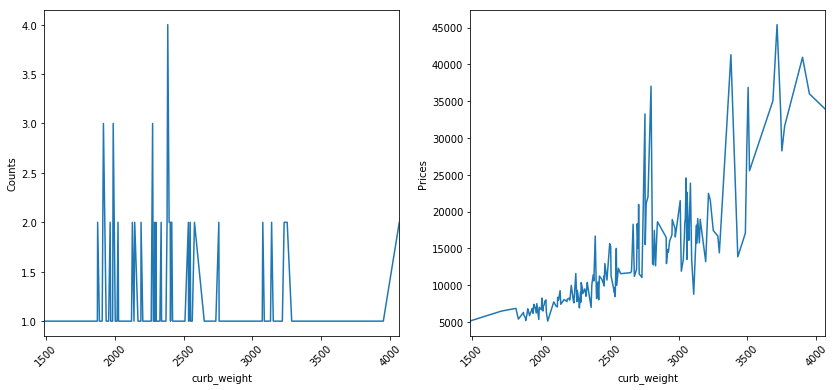

In [46]:
plot_feature(df, 'curb_weight')

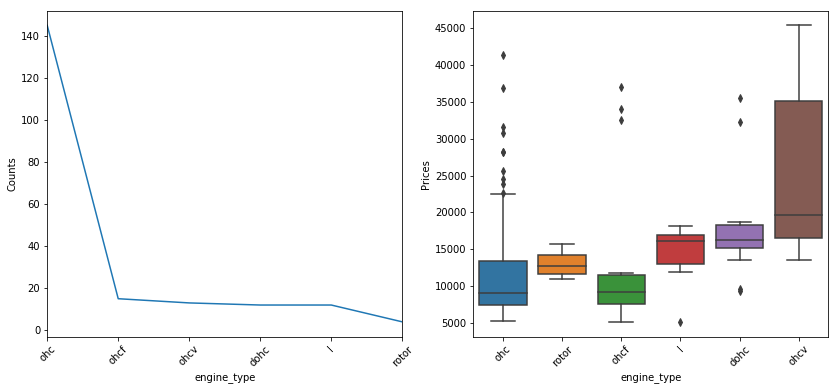

In [47]:
plot_feature(df, 'engine_type')

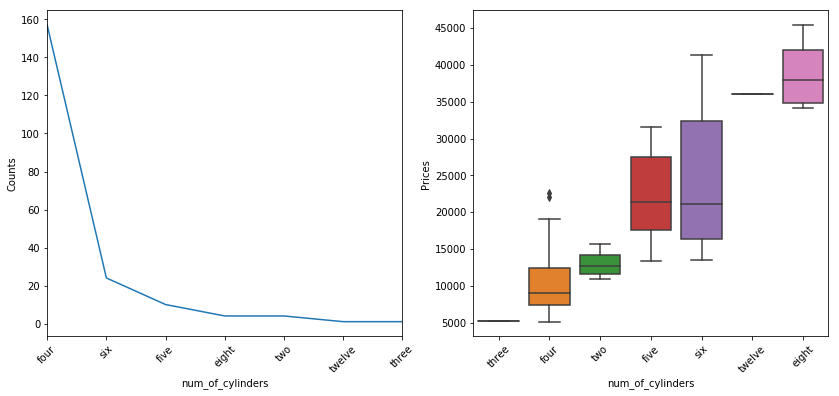

In [48]:
plot_feature(df, 'num_of_cylinders')

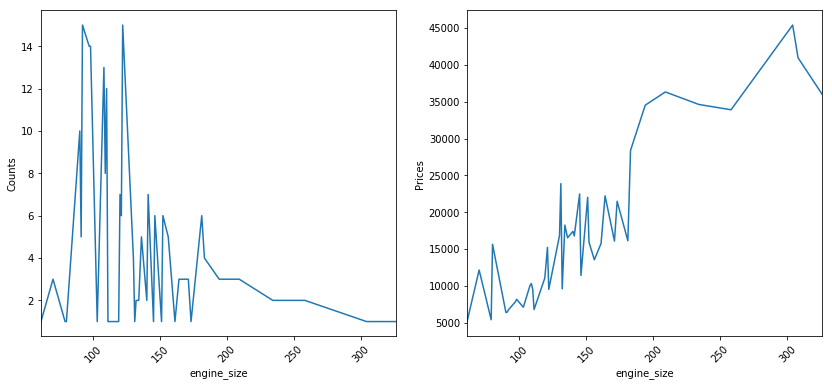

In [49]:
plot_feature(df, 'engine_size')

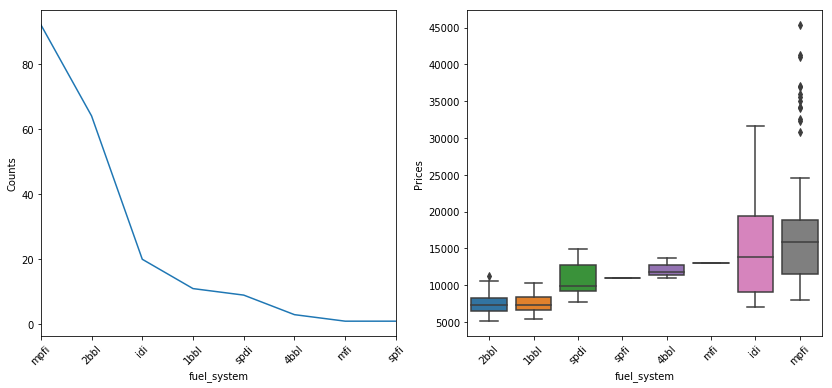

In [50]:
plot_feature(df, 'fuel_system')

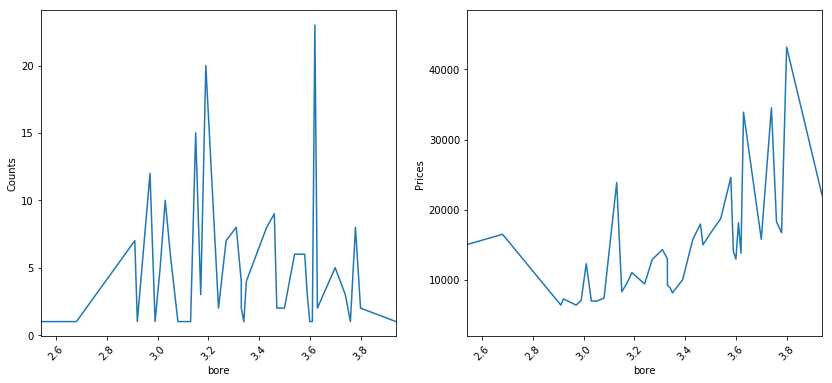

In [51]:
plot_feature(df, 'bore')

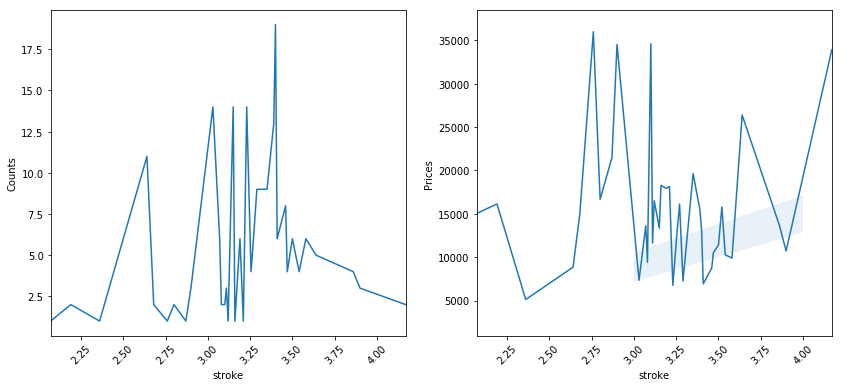

In [52]:
plot_feature(df, 'stroke')

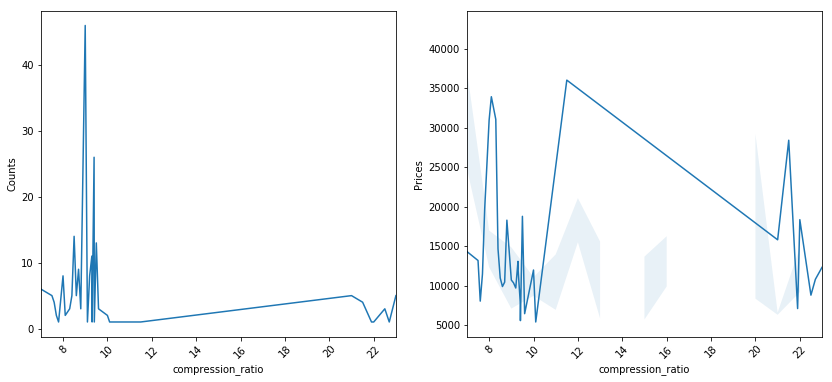

In [53]:
plot_feature(df, 'compression_ratio')

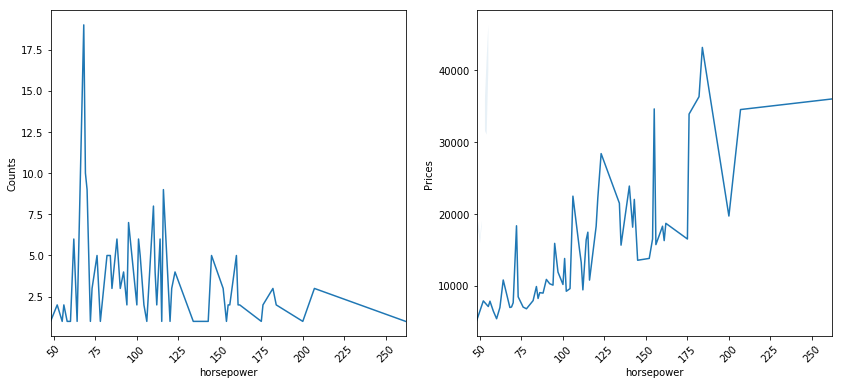

In [54]:
plot_feature(df, 'horsepower')

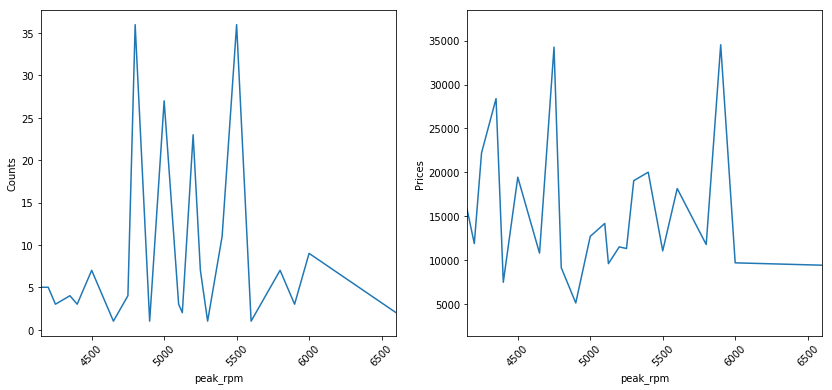

In [55]:
plot_feature(df, 'peak_rpm')

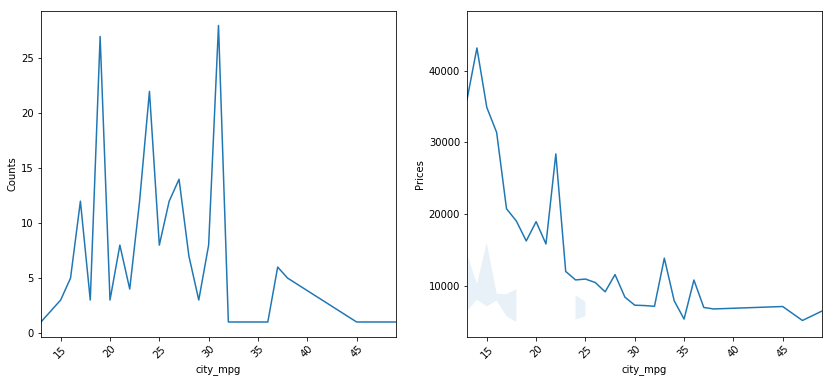

In [56]:
plot_feature(df, 'city_mpg')

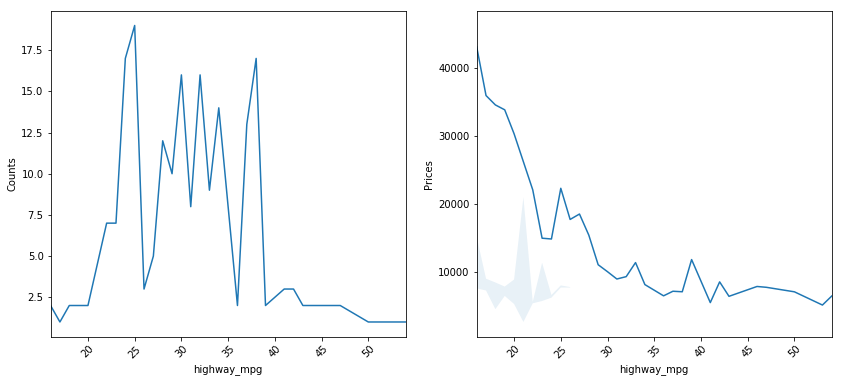

In [57]:
plot_feature(df, 'highway_mpg')

## Dealing with categorical columns

In [58]:
df.num_of_cylinders.value_counts()

four      157
six        24
five       10
eight       4
two         4
twelve      1
three       1
Name: num_of_cylinders, dtype: int64

In [59]:
df["num_of_cylinders"] = df["num_of_cylinders"].astype('category')

In [60]:
df.loc[df.index[df.num_of_cylinders == "two"], "num_of_cylin"] = 2
df.loc[df.index[df.num_of_cylinders == "three"], "num_of_cylin"] = 3
df.loc[df.index[df.num_of_cylinders == "four"], "num_of_cylin"] = 4
df.loc[df.index[df.num_of_cylinders == "five"], "num_of_cylin"] = 5
df.loc[df.index[df.num_of_cylinders == "six"], "num_of_cylin"] = 6
df.loc[df.index[df.num_of_cylinders == "eight"], "num_of_cylin"] = 8
df.loc[df.index[df.num_of_cylinders == "twelve"], "num_of_cylin"] = 12

df.drop(["num_of_cylinders"], axis=1, inplace=True)

In [61]:
df.dtypes

make                 category
fuel_type            category
aspiration           category
num_of_doors         category
body_style           category
drive_wheels         category
engine_location      category
wheel_base            float64
length                float64
width                 float64
height                float64
curb_weight             int64
engine_type          category
engine_size             int64
fuel_system          category
bore                  float64
stroke                float64
compression_ratio     float64
horsepower            float64
peak_rpm              float64
city_mpg                int64
highway_mpg             int64
price                 float64
num_of_cylin          float64
dtype: object

In [62]:
cat_columns = ["fuel_type", "fuel_system", "aspiration", "num_of_doors",
               "body_style", "drive_wheels", "engine_location", "engine_type"]

df = pd.get_dummies(df, columns=cat_columns, drop_first=True)

In [63]:
df.head()

,make,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,body_style_convertible,body_style_hardtop,drive_wheels_4wd,drive_wheels_rwd,engine_location_rear,engine_type_rotor,engine_type_ohcf,engine_type_l,engine_type_dohc,engine_type_ohcv
0,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,1,0,0,1,0,0,0,0,1,0
1,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,1,0,0,1,0,0,0,0,1,0
2,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,1,0,0,0,0,0,1
3,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,1,0,0,0,0,0,0,0


# Lets ignore make and base our price predictions on other features

In [64]:
df.drop(["make"], axis=1, inplace=True)
df.head()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,...,body_style_convertible,body_style_hardtop,drive_wheels_4wd,drive_wheels_rwd,engine_location_rear,engine_type_rotor,engine_type_ohcf,engine_type_l,engine_type_dohc,engine_type_ohcv
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,1,0,0,1,0,0,0,0,1,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,1,0,0,1,0,0,0,0,1,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,...,0,0,0,1,0,0,0,0,0,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,...,0,0,1,0,0,0,0,0,0,0


## Correlations between features and response

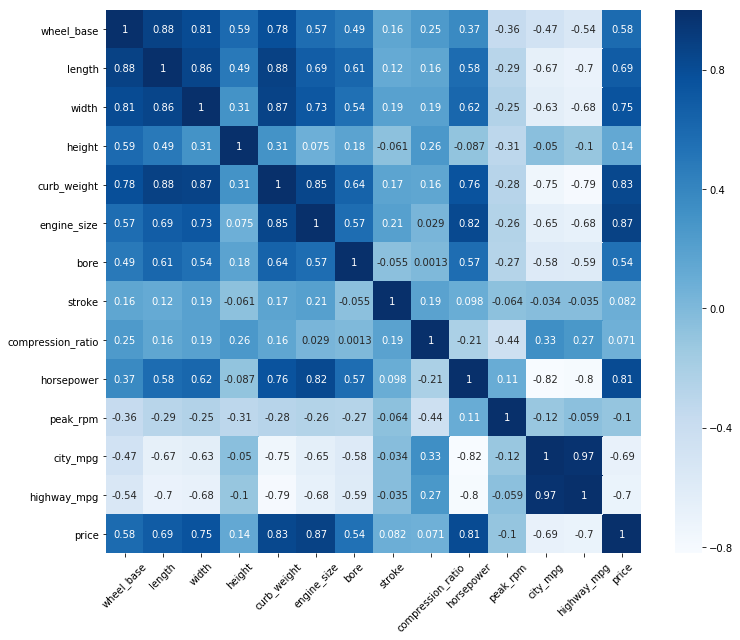

In [65]:
fig = plt.figure(figsize=(12, 10))
features = numeric_cols
sns.heatmap(df[features + ['price']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

## Train and Test Split

In [66]:
train, test = train_test_split(df, test_size=0.2)

In [67]:
Y_train = train.price
X_train = train.drop(["price"], axis=1)

In [68]:
Y_test = test.price
X_test = test.drop(["price"], axis=1)

## Train and execute Linear Regression model

In [69]:
lrm = linear_model.LinearRegression()

In [70]:
lrm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
predicted_price = lrm.predict(X_test)

## Assess the performance of the model

In [72]:
r_square = r2_score(Y_test, predicted_price)
print(r_square)

0.7711668358853372


In [73]:
actual_data = np.array(Y_test)

for i in range(len(predicted_price)):
    actual = actual_data[i]
    predicted = predicted_price[i]
    explained = ((actual_data[i] - predicted_price[i]) / actual_data[i]) * 100
    
    print('Actual value ${:,.2f}, Predicted value ${:,.2f} ({:,.2f}%)'.format(actual, predicted, explained))

Actual value $9,549.00, Predicted value $10,947.03 (-14.64%)
Actual value $16,695.00, Predicted value $18,970.61 (-13.63%)
Actual value $16,845.00, Predicted value $17,724.17 (-5.22%)
Actual value $45,400.00, Predicted value $37,557.27 (17.27%)
Actual value $6,229.00, Predicted value $5,751.84 (7.66%)
Actual value $18,399.00, Predicted value $16,629.66 (9.62%)
Actual value $7,053.00, Predicted value $6,220.93 (11.80%)
Actual value $10,595.00, Predicted value $10,523.76 (0.67%)
Actual value $11,259.00, Predicted value $13,424.00 (-19.23%)
Actual value $18,150.00, Predicted value $19,852.70 (-9.38%)
Actual value $7,295.00, Predicted value $7,714.50 (-5.75%)
Actual value $18,344.00, Predicted value $12,780.18 (30.33%)
Actual value $34,184.00, Predicted value $29,192.90 (14.60%)
Actual value $9,279.00, Predicted value $10,441.73 (-12.53%)
Actual value $13,499.00, Predicted value $14,990.19 (-11.05%)
Actual value $7,975.00, Predicted value $10,953.53 (-37.35%)
Actual value $6,377.00, Predic